# Bayes' Theorem

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

A formula for calculating the probability an event given prior knowledge of related conditions.

##### Example: Doctor Predicting a Patient's Diagnosis
* Doctor's test has 99% recall and 98% specificity
  * Specificity:
    * True negative rate
    * Proportion of truly negative instances
  * 99% recall -> 99% of patients who truly have the disease were predicted to have it
  * 98% specificity -> 98% of patients who truly do not have the disease were predicted not to have it
  * Probability that a person has it is only 0.2%
* Using Bayes' Theorem, what is the probability that a person actually has the disease?
  * $P(A)$ - probability of having the disease = 0.2%
  * $P(B|A)$ - probability of a positive test result given a patient has the disease = 0.99
  * $P(B)$ - probability of a positive test result:
    * Equal to the sume of true and positive test results
    * $P(B) = P(B|A)P(A) + P(B|\overline{A})P( \overline{A}) = 0.99 \times 0.002 + 0.02 \times 0.998 = 0.022$
  * Probability of haveing disease:
    * $P(Disease|Positive) = \frac{0.99\times0.002}{0.99\times0.002 + 0.02\times0.998} = 0.09$
  

# Discriminative and Generative Models

**Probabilistic discriminative models**, such as logistic regression, learn to estimate the
conditional probability $P(Y|X)$ and which class is most likely given the input features.

**Non-probabilistic discriminative models**, such as KNN, directly map features to classes.

**Generative Models** do not directly learn  a decision boundary.  They instead model joint
probability distribution of features and classes. (Models how the classes generate features)

In [1]:
# Comparing performance of Naive Bayes and logistic regression classifier
%matplotlib inline

/home/will/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


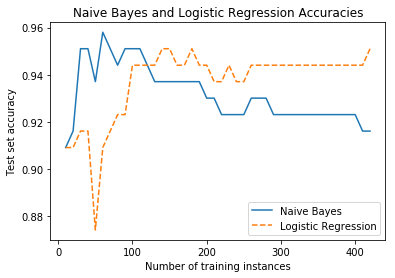

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset and split 20% as test set and 80% for test set
# stratify=y specifies that training and test sets should have equal proportion positive
# and negative instances
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

lr = LogisticRegression()
nb = GaussianNB()

lr_scores = []
nb_scores = []

train_sizes = range(10, len(X_train), 10)
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(
        X_train, y_train, train_size=train_size, stratify=y_train, random_state=11)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
    
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naive Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()

/home/will/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


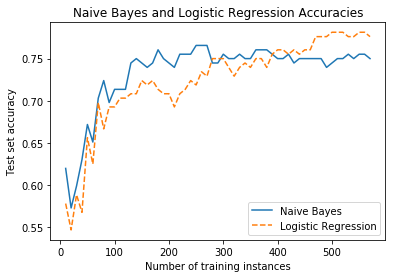

In [5]:
# Load file with pandas and split using column indicies (since there are no headers). 
# Then create a stratified test set
df = pd.read_csv('./pima-indians-diabetes.data', header=None)
y = df[8]
X = df[[0, 1, 2, 3, 4, 5, 6, 7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

lr = LogisticRegression()
nb = GaussianNB()

lr_scores = []
nb_scores = []

# Set increasingly large are sizes for training and evaluating the model
train_sizes = range(10, len(X_train), 10)

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(
        X_train, y_train, train_size=train_size, stratify=y_train, random_state=11)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
    
# Plot the data
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naive Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()